# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [7]:
weather_api_key

'7e78c810a86ff9ffe4ed443e1e066aea'

In [8]:
#api.openweathermap.org/data/2.5/weather?&APPID=7e78c810a86ff9ffe4ed443e1e066aea&q=London

In [9]:
# Create empty lists to append the API data into
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1
set_count = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

#Loop through the cities in the city list 
for i, city in enumerate(cities):  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        if(i%50==0 and i>=50):
            record = 0
            set_count+=1
            
        print(f"Processing Record {record} of Set {set_count} | {city_record}")
        #print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
#         time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | East London
Processing Record 2 of Set 1 | Salalah
Processing Record 3 of Set 1 | Udachny
Processing Record 4 of Set 1 | Husavik
City not found. Skipping...
Processing Record 5 of Set 1 | Guerrero Negro
Processing Record 6 of Set 1 | Kaitangata
Processing Record 7 of Set 1 | Makakilo City
City not found. Skipping...
Processing Record 8 of Set 1 | Slupca
Processing Record 9 of Set 1 | Ribeira Grande
Processing Record 10 of Set 1 | Mahebourg
Processing Record 11 of Set 1 | Kavieng
Processing Record 12 of Set 1 | Talnakh
Processing Record 13 of Set 1 | Vodnyy
Processing Record 14 of Set 1 | Nome
Processing Record 15 of Set 1 | Tiarei
Processing Record 16 of Set 1 | Bathsheba
Processing Record 17 of Set 1 | Kodiak
Processing Record 18 of Set 1 | Busselton
Processing Record 19 of Set 1 | Klyuchi
Processing Record 20 of Set 1 | Avarua
Processing Record 21 of Set 1 | Longonjo
Processing Record 22 of Set 1 | 

Processing Record 7 of Set 5 | Ahipara
Processing Record 8 of Set 5 | La Rioja
Processing Record 9 of Set 5 | Nador
Processing Record 10 of Set 5 | Hamilton
Processing Record 11 of Set 5 | Mauriti
City not found. Skipping...
Processing Record 12 of Set 5 | Geraldton
Processing Record 13 of Set 5 | Kahului
Processing Record 14 of Set 5 | Longyearbyen
Processing Record 15 of Set 5 | Nemuro
Processing Record 16 of Set 5 | Wilmington
Processing Record 17 of Set 5 | Inuvik
Processing Record 18 of Set 5 | Takoradze
Processing Record 19 of Set 5 | Ercis
Processing Record 20 of Set 5 | Kenai
Processing Record 21 of Set 5 | Maxixe
Processing Record 22 of Set 5 | Kandrian
Processing Record 23 of Set 5 | Lixouri
Processing Record 24 of Set 5 | Laguna
Processing Record 25 of Set 5 | Hong Kong
City not found. Skipping...
Processing Record 26 of Set 5 | Zyryanka
Processing Record 27 of Set 5 | Yumen
Processing Record 28 of Set 5 | Mount Gambier
Processing Record 29 of Set 5 | Hope
Processing Record 

Processing Record 11 of Set 9 | San Patricio
Processing Record 12 of Set 9 | Auki
Processing Record 13 of Set 9 | Redencao
Processing Record 14 of Set 9 | Normal
Processing Record 15 of Set 9 | Port Elizabeth
Processing Record 16 of Set 9 | Vardo
Processing Record 17 of Set 9 | Muros
Processing Record 18 of Set 9 | Pasinler
Processing Record 19 of Set 9 | Vagur
Processing Record 20 of Set 9 | Lambarene
Processing Record 21 of Set 9 | Cortes
Processing Record 22 of Set 9 | Tautira
Processing Record 23 of Set 9 | Noumea
Processing Record 24 of Set 9 | Provideniya
Processing Record 25 of Set 9 | Flin Flon
Processing Record 26 of Set 9 | Ust'-Omchug
Processing Record 27 of Set 9 | Umm Kaddadah
Processing Record 28 of Set 9 | Saldanha
Processing Record 29 of Set 9 | Ugoofaaru
Processing Record 30 of Set 9 | Oistins
Processing Record 31 of Set 9 | Havelock
Processing Record 32 of Set 9 | Aranos
Processing Record 33 of Set 9 | Kulhudhuffushi
Processing Record 34 of Set 9 | Jalu
Processing Rec

Processing Record 12 of Set 12 | Iquique
Processing Record 13 of Set 12 | Marquette
Processing Record 14 of Set 12 | Fort Saint James
Processing Record 15 of Set 12 | Rudnogorsk
Processing Record 16 of Set 12 | Nizwa
Processing Record 17 of Set 12 | Hachinohe
City not found. Skipping...
Processing Record 18 of Set 12 | Tupiza
Processing Record 19 of Set 12 | Peterhead
Processing Record 20 of Set 12 | Manhattan
Processing Record 21 of Set 12 | Mandalgovi
Processing Record 22 of Set 12 | Madisonville
Processing Record 23 of Set 12 | Portland
Processing Record 24 of Set 12 | Te Anau
Processing Record 25 of Set 12 | Pringsewu
Processing Record 26 of Set 12 | Mersa Matruh
Processing Record 27 of Set 12 | Bago
Processing Record 28 of Set 12 | Assiniboia
Processing Record 29 of Set 12 | Bubaque
Processing Record 30 of Set 12 | College
Processing Record 31 of Set 12 | Kvitok
Processing Record 32 of Set 12 | Lucapa
Processing Record 33 of Set 12 | Methoni
Processing Record 34 of Set 12 | Ciudad

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          586
Cloudiness    586
Country       586
Date          586
Humidity      586
Lat           586
Lng           586
Max Temp      586
Wind Speed    586
dtype: int64

In [11]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,61,ZA,1579824903,78,-33.02,27.91,68.25,13.00
1,Salalah,75,OM,1579824978,78,17.02,54.09,75.20,2.24
2,Udachny,75,RU,1579824979,65,66.42,112.40,-38.20,6.71
3,Husavik,90,IS,1579824979,86,66.04,-17.34,26.60,35.57
4,Guerrero Negro,0,MX,1579824979,48,27.98,-114.06,69.21,11.30


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

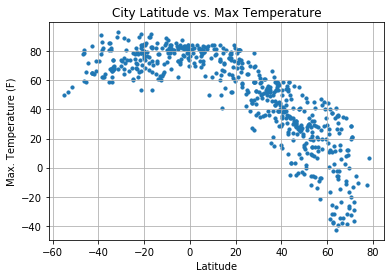

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

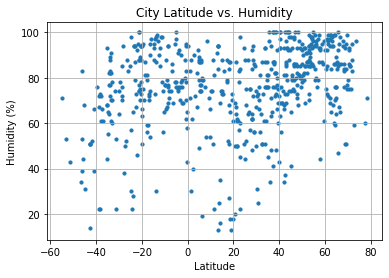

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

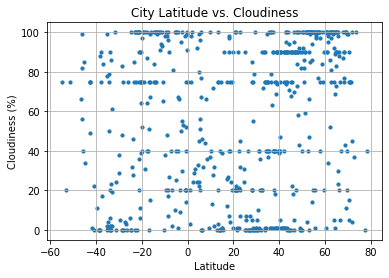

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

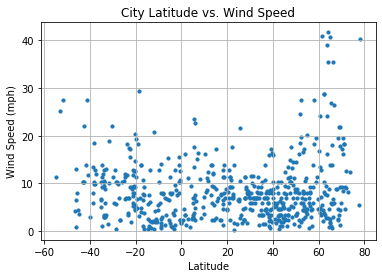

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots
#locate the data with a latitude value equal to or greater than 0 for northern hemisphere
north_hem = weather_data.loc[weather_data['Lat'] >= 0]
#locate the data with a latitude value less than 0 for southern hemisphere
south_hem = weather_data.loc[weather_data['Lat'] < 0]

In [17]:
# Create Northern and Southern Hemisphere DataFrames
#pull individual column data for scatter plots based on hemisphere
north_temp = north_hem['Max Temp']
south_temp = south_hem['Max Temp']
north_lat = north_hem['Lat']
south_lat = south_hem['Lat']
north_humid = north_hem['Humidity']
south_humid = south_hem['Humidity']
north_clouds = north_hem['Cloudiness']
south_clouds = south_hem['Cloudiness']
north_wind = north_hem['Wind Speed']
south_wind = south_hem['Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8400559925067062


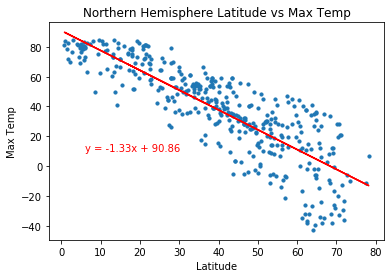

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker='o', s=10)
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/nhlvmt.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.36988399485875106


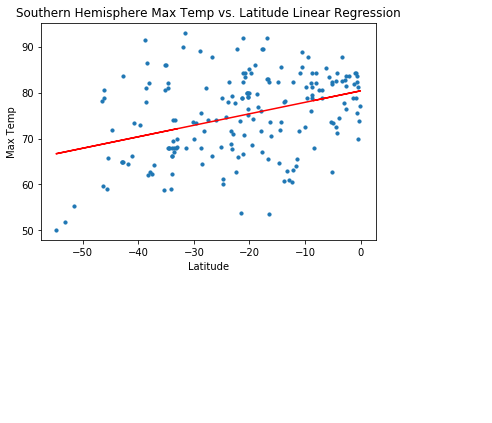

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker='o', s=10)
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=10, color='red')
plt.title('Southern Hemisphere Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The r-squared is: {rvalue}')
plt.savefig('output_data/shlvmt.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression